In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import sys
sys.path.append("lib")

import lib

import torch
torch.set_default_dtype(torch.float64)

from functorch import vmap
from torch.utils.data import DataLoader
import tqdm

/home/peiyi/mambaforge3/envs/rom/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda")

In [3]:
coords_x, coords_y, _ = lib.utils.read_coords("2d_burger_data/time_step_0.csv")
coords = torch.stack((coords_x, coords_y), dim=1)

In [4]:
num_steps = 501
num_nodes = coords_x.shape[0]

datas = lib.utils.read_data(num_steps, num_nodes, '2d_burger_data/time_step_', 'vel_0')
datas.shape

torch.Size([501, 14641])

In [5]:
N = datas.shape[1]
n = 20
mu = int(np.ceil(N/20))
neighbours = lib.utils.topk_neighbours(coords, mu)

In [6]:
batch_size = 50
train_data = DataLoader(datas, batch_size=batch_size, shuffle=True)

In [7]:
ed = lib.nrbs.EncoderDecoder(N=N, n=n, mu=mu, neighbours=neighbours, device=device)

In [8]:
encoded = ed.nrbs.encode(datas[:15].to(device))
encoded.shape

torch.Size([15, 20])

In [9]:
ed.nrbs = torch.load('models/nrbs.pth')

In [10]:
ed.train(train_data_loader=train_data, epochs=500)

100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 0, loss = 3.5170194293529993


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 1, loss = 3.5140632377084122


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 2, loss = 3.512867416924991


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 3, loss = 3.5125556906713777


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 4, loss = 3.5119784584444464


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 5, loss = 3.5125747480987695


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 6, loss = 3.511227185838871


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 7, loss = 3.5115283925373424


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 8, loss = 3.511039722870457


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 9, loss = 3.510602745918264


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 10, loss = 3.5101850218121466


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 11, loss = 3.5100281436272143


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 12, loss = 3.509627112255543


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 13, loss = 3.509281084209399


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 14, loss = 3.5096077814856192


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 15, loss = 3.509241242651775


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 16, loss = 3.5090249229656805


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 17, loss = 3.5084373049055584


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 18, loss = 3.5084748936537262


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 19, loss = 3.5076631328996255


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 20, loss = 3.5084188882764384


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 21, loss = 3.508294905196703


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 22, loss = 3.506620150174864


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 23, loss = 3.5063548479328563


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 24, loss = 3.5062694156372594


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 25, loss = 3.5059586346254608


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 26, loss = 3.505557477131147


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 27, loss = 3.505280830089651


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 28, loss = 3.504966748124907


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 29, loss = 3.5048953453863665


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 30, loss = 3.504411078647114


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 31, loss = 3.5037651077651737


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 32, loss = 3.5034503919381437


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 33, loss = 3.503686113798394


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 34, loss = 3.5033324160186026


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 35, loss = 3.503471859930416


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 36, loss = 3.5025064317597474


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 37, loss = 3.502593958908005


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 38, loss = 3.5027524374821857


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 39, loss = 3.502613178716055


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 40, loss = 3.5015789677742424


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 41, loss = 3.501704196944133


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 42, loss = 3.5007833407941606


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 43, loss = 3.50132505498228


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 44, loss = 3.500643306614391


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 45, loss = 3.500627262852891


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 46, loss = 3.5005230570495143


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 47, loss = 3.499436189828858


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 48, loss = 3.4990978578283682


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 49, loss = 3.4986089002038594


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 50, loss = 3.49872044345657


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 51, loss = 3.4978288228684606


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 52, loss = 3.4977568703022768


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 53, loss = 3.497495218298572


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 54, loss = 3.4974056162738583


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 55, loss = 3.4976489429314475


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 56, loss = 3.496859953737576


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 57, loss = 3.4964793787708883


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 58, loss = 3.4965997238010003


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 59, loss = 3.4964170628424833


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 60, loss = 3.497247916669382


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 61, loss = 3.4953793010242915


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 62, loss = 3.4956238894897695


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 63, loss = 3.4953949958583856


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 64, loss = 3.494607869511969


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 65, loss = 3.494059458887242


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 66, loss = 3.493942860419015


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 67, loss = 3.4934682757100077


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 68, loss = 3.493375400254516


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 69, loss = 3.4937970609174345


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 70, loss = 3.4926976510115995


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 71, loss = 3.492771404747202


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 72, loss = 3.492436026203736


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 73, loss = 3.491360633942923


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 74, loss = 3.4916815535980374


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 75, loss = 3.4921157292264406


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 76, loss = 3.491288758408883


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 77, loss = 3.490529832184137


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 78, loss = 3.4902053778492834


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 79, loss = 3.490208900315393


100%|██████████| 11/11 [00:14<00:00,  1.35s/it]


Itr 80, loss = 3.490266315293738


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 81, loss = 3.4904293420016095


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 82, loss = 3.489492193508163


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 83, loss = 3.488801124276516


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 84, loss = 3.489305183520484


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 85, loss = 3.4884604901069123


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 86, loss = 3.4878241205800906


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 87, loss = 3.487887149884133


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 88, loss = 3.487809741269816


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 89, loss = 3.4873544080223318


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 90, loss = 3.486914725067923


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 91, loss = 3.4865087312917638


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 92, loss = 3.4862303854829757


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 93, loss = 3.486422808522466


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 94, loss = 3.4862905495514687


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 95, loss = 3.4851651004235498


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 96, loss = 3.4856672164248828


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 97, loss = 3.4854932608934694


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 98, loss = 3.48494634052116


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 99, loss = 3.484070691180791


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 100, loss = 3.4843653483918864


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 101, loss = 3.4840193447470154


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 102, loss = 3.4843411911317177


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 103, loss = 3.483659791269354


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 104, loss = 3.482667314256261


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 105, loss = 3.4823640585134954


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 106, loss = 3.4822780190764835


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 107, loss = 3.4820253004899167


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 108, loss = 3.481409838092166


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 109, loss = 3.48122861744742


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 110, loss = 3.4811783851501104


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 111, loss = 3.4812955667205574


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 112, loss = 3.4805033651197688


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 113, loss = 3.4805312131877195


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 114, loss = 3.47994074132805


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 115, loss = 3.4804121644208745


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 116, loss = 3.479748985059484


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 117, loss = 3.479398112381665


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 118, loss = 3.4789896465396057


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 119, loss = 3.4790562413187427


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 120, loss = 3.478425680813079


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 121, loss = 3.4777575605859146


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 122, loss = 3.4774512947897263


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 123, loss = 3.477190551816062


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 124, loss = 3.4778304814194985


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 125, loss = 3.478235112744454


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 126, loss = 3.4766661269352483


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 127, loss = 3.476409053682802


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 128, loss = 3.475867626087726


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 129, loss = 3.4762724196783177


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 130, loss = 3.4756436374314723


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 131, loss = 3.4755528030876834


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 132, loss = 3.4753441902298583


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 133, loss = 3.47441516644666


100%|██████████| 11/11 [00:14<00:00,  1.36s/it]


Itr 134, loss = 3.4741279735216315


100%|██████████| 11/11 [00:15<00:00,  1.37s/it]


Itr 135, loss = 3.4741883886376317


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 136, loss = 3.4737076574634576


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 137, loss = 3.4734021764897203


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 138, loss = 3.473139678000867


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 139, loss = 3.4728253643360016


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 140, loss = 3.472283526351118


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 141, loss = 3.47252979597316


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 142, loss = 3.4729494822142586


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 143, loss = 3.472774283213029


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 144, loss = 3.4714401415768767


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 145, loss = 3.470926807812721


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 146, loss = 3.4710284627825034


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 147, loss = 3.4703849372024007


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 148, loss = 3.4704295584266758


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 149, loss = 3.4697729059578553


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 150, loss = 3.4704645022268905


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 151, loss = 3.4696746563607985


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 152, loss = 3.468794504884179


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 153, loss = 3.4697368548492538


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 154, loss = 3.4682897796420074


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 155, loss = 3.468817651407174


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 156, loss = 3.468255119761469


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 157, loss = 3.468027871833176


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 158, loss = 3.467685702679292


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 159, loss = 3.4673993309304723


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 160, loss = 3.466807262993353


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 161, loss = 3.4666670888734377


100%|██████████| 11/11 [00:14<00:00,  1.34s/it]


Itr 162, loss = 3.465711437455292


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 163, loss = 3.4658365133997653


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 164, loss = 3.4657829023828044


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 165, loss = 3.4655431309926104


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 166, loss = 3.4649472538660224


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 167, loss = 3.4650726875572095


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 168, loss = 3.4649841283450518


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 169, loss = 3.4639016933249436


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 170, loss = 3.4640104307093686


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 171, loss = 3.4635873732006335


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 172, loss = 3.463329212103856


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 173, loss = 3.4633461336220264


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 174, loss = 3.4626785068563364


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 175, loss = 3.462332480539095


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 176, loss = 3.4620478804200063


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 177, loss = 3.4615204184295956


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 178, loss = 3.4616702706921307


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 179, loss = 3.4618656263598626


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 180, loss = 3.4610618386274465


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 181, loss = 3.4625295148810658


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 182, loss = 3.460649130144565


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 183, loss = 3.461764885190728


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 184, loss = 3.4600338677524767


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 185, loss = 3.459502526506616


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 186, loss = 3.459184958567367


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 187, loss = 3.4592362412387683


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 188, loss = 3.4585497189712084


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 189, loss = 3.4587064580843183


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 190, loss = 3.4582306325070595


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 191, loss = 3.4578746574210335


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 192, loss = 3.4577451709493454


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 193, loss = 3.45723724041601


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 194, loss = 3.457692599940258


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 195, loss = 3.4579795612998105


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 196, loss = 3.457701440716151


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 197, loss = 3.456438097556222


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 198, loss = 3.4558332760861408


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 199, loss = 3.4556275802740055


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 200, loss = 3.455490280556322


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 201, loss = 3.455275090699274


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 202, loss = 3.454707389490724


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 203, loss = 3.4543353496518128


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 204, loss = 3.4543474068769506


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 205, loss = 3.453537896745051


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 206, loss = 3.453623763348367


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 207, loss = 3.453471499187905


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 208, loss = 3.4536316381070913


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 209, loss = 3.4531771342365567


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 210, loss = 3.452681351352856


100%|██████████| 11/11 [00:14<00:00,  1.30s/it]


Itr 211, loss = 3.4522484306502657


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 212, loss = 3.4519799137155074


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 213, loss = 3.4522703908205807


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 214, loss = 3.4515585827702497


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 215, loss = 3.4510532519259534


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 216, loss = 3.4509608492067696


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 217, loss = 3.4507776489625224


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 218, loss = 3.451367748033731


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 219, loss = 3.4506493916802583


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 220, loss = 3.449714614014644


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 221, loss = 3.449526606822444


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 222, loss = 3.449479431846877


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 223, loss = 3.449066491617255


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 224, loss = 3.4490569095532018


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 225, loss = 3.447998970286222


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 226, loss = 3.448080626130219


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 227, loss = 3.4480072688831984


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 228, loss = 3.447394440171639


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 229, loss = 3.447673357378682


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 230, loss = 3.447199651491637


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 231, loss = 3.4465722643891215


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 232, loss = 3.446319226314596


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 233, loss = 3.4463495269574453


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 234, loss = 3.4457519513034622


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 235, loss = 3.4459008433687184


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 236, loss = 3.445311893025068


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 237, loss = 3.4459585256031353


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 238, loss = 3.4447444487761785


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 239, loss = 3.444505301089722


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 240, loss = 3.443999232889854


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 241, loss = 3.443891097292013


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 242, loss = 3.4434664147522263


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 243, loss = 3.4432811225146795


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 244, loss = 3.442771104351091


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 245, loss = 3.442411229430506


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 246, loss = 3.4419807996889125


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 247, loss = 3.441695777892212


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 248, loss = 3.4415782275629043


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 249, loss = 3.441550987504376


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 250, loss = 3.441304148095389


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 251, loss = 3.4411146806491115


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 252, loss = 3.441193891225575


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 253, loss = 3.441025415824995


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 254, loss = 3.440144886502523


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 255, loss = 3.439938145781981


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 256, loss = 3.440003504773756


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 257, loss = 3.4389828928525366


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 258, loss = 3.4406710661189557


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 259, loss = 3.438745626092294


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 260, loss = 3.438312661023751


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 261, loss = 3.438385906370227


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 262, loss = 3.437969380419223


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 263, loss = 3.4384475162499633


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 264, loss = 3.4384862356888557


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 265, loss = 3.4379398647450485


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 266, loss = 3.436926879089602


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 267, loss = 3.437110744377264


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 268, loss = 3.43591571597086


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 269, loss = 3.4362297885583715


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 270, loss = 3.4354987488332243


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 271, loss = 3.4356400206142994


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 272, loss = 3.4352480877129383


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 273, loss = 3.4350475452750215


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 274, loss = 3.434194254223844


100%|██████████| 11/11 [00:14<00:00,  1.35s/it]


Itr 275, loss = 3.435013905539206


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 276, loss = 3.434034930540304


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 277, loss = 3.433702956842313


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 278, loss = 3.4333773261388028


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 279, loss = 3.4343206159306536


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 280, loss = 3.4340846769910476


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 281, loss = 3.4336743657070192


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 282, loss = 3.4323485051963902


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 283, loss = 3.431606085906586


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 284, loss = 3.4313611611707158


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 285, loss = 3.432082787641835


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 286, loss = 3.4307633474024315


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 287, loss = 3.4307515264818105


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 288, loss = 3.430668811680502


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 289, loss = 3.4304674091175777


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 290, loss = 3.432186437959554


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 291, loss = 3.430534338501263


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 292, loss = 3.4297165354349897


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 293, loss = 3.4289775230834936


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 294, loss = 3.428617920332678


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 295, loss = 3.428894943545892


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 296, loss = 3.428385724427513


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 297, loss = 3.4278332902880737


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 298, loss = 3.428589684288502


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 299, loss = 3.4274584329887112


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 300, loss = 3.427194100755961


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 301, loss = 3.42684637385558


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 302, loss = 3.4270211194890687


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 303, loss = 3.4262675178950834


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 304, loss = 3.4264909236552046


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 305, loss = 3.4263805487548002


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 306, loss = 3.425953817738505


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 307, loss = 3.425209541676819


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 308, loss = 3.425236411836235


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 309, loss = 3.4244593673222266


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 310, loss = 3.425287992387127


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 311, loss = 3.424428506884591


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 312, loss = 3.424266748879382


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 313, loss = 3.423575937383851


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 314, loss = 3.4259117076119705


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 315, loss = 3.4232498769622266


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 316, loss = 3.423111491946412


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 317, loss = 3.42274307186078


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 318, loss = 3.422383167194091


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 319, loss = 3.422475270438876


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 320, loss = 3.422069392165552


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 321, loss = 3.421287799288473


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 322, loss = 3.4214526140906703


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 323, loss = 3.420764159285303


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 324, loss = 3.4203180361178664


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 325, loss = 3.420038963277827


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 326, loss = 3.419692908321507


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 327, loss = 3.419785283767887


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 328, loss = 3.4195597929681303


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 329, loss = 3.419592256768918


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 330, loss = 3.4203078289771143


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 331, loss = 3.4189450231381833


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 332, loss = 3.4188486164838854


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 333, loss = 3.4189715487945116


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 334, loss = 3.4180870691842853


100%|██████████| 11/11 [00:14<00:00,  1.35s/it]


Itr 335, loss = 3.4176282378371736


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 336, loss = 3.417052909430998


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 337, loss = 3.417435483336207


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 338, loss = 3.4177561847950306


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 339, loss = 3.416466220271202


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 340, loss = 3.415955060690027


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 341, loss = 3.415920438926636


100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


Itr 342, loss = 3.4156369393952493


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 343, loss = 3.4152144634877195


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 344, loss = 3.41600812649934


100%|██████████| 11/11 [00:14<00:00,  1.31s/it]


Itr 345, loss = 3.414736788363536


100%|██████████| 11/11 [00:14<00:00,  1.34s/it]


Itr 346, loss = 3.414506945108961


100%|██████████| 11/11 [00:14<00:00,  1.34s/it]


Itr 347, loss = 3.415034956609116


100%|██████████| 11/11 [00:14<00:00,  1.33s/it]


Itr 348, loss = 3.413969037881803


 64%|██████▎   | 7/11 [00:09<00:05,  1.44s/it]

In [ ]:
ed.nrbs = torch.load('models/nrbs.pth')

In [ ]:
approximates = ed(datas[499:501].to(device))
approximates[1].shape

torch.Size([14641])

In [ ]:
approximates[1]

tensor([ 1.4008e-02,  1.4007e-02,  1.4060e-02,  ..., -7.4293e-05,
        -2.3927e-04, -1.7676e-04], device='cuda:0', grad_fn=<SelectBackward0>)

In [ ]:
datas[500]

tensor([1.3673e-02, 1.3859e-02, 1.4044e-02,  ..., 6.5629e-31, 6.5629e-31,
        9.4247e-31])

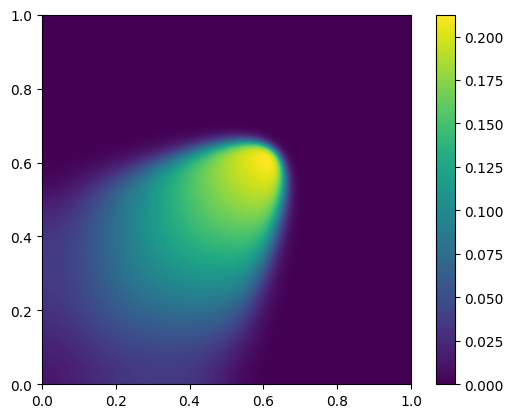

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = coords_x.tolist()
y = coords_y.tolist()
z = datas[500].tolist()

# target grid to interpolate to
xi = yi = np.linspace(0,1.0,1200)
xi,yi = np.meshgrid(xi,yi)

# set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='cubic')

plt.imshow(zi,origin='lower', extent=[0,1,0,1])
plt.colorbar()

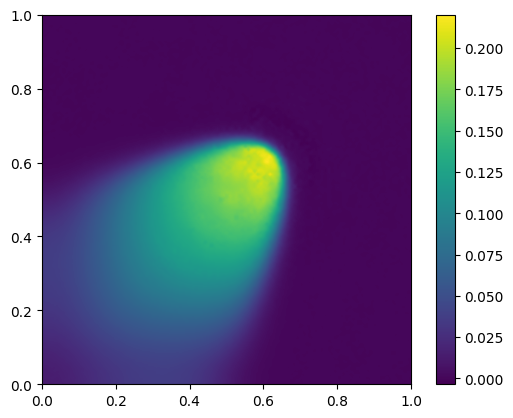

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = coords_x.tolist()
y = coords_y.tolist()
z = approximates[1].detach().cpu().tolist()

# target grid to interpolate to
xi = yi = np.linspace(0,1.0,1200)
xi,yi = np.meshgrid(xi,yi)

# set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='cubic')

plt.imshow(zi,origin='lower', extent=[0,1,0,1])
plt.colorbar()

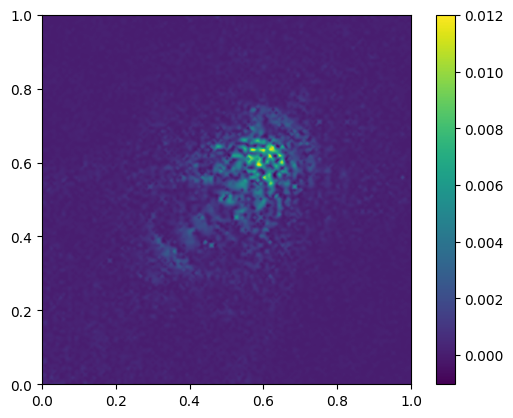

In [ ]:
err = abs(datas[500] - approximates[1].detach().cpu())

# data coordinates and values
z = err.tolist()

# target grid to interpolate to
xi = yi = np.linspace(0,1.0,1200)
xi,yi = np.meshgrid(xi,yi)

# set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='cubic')

plt.imshow(zi,origin='lower', extent=[0,1,0,1])
plt.colorbar()